In [13]:
import cv2
import numpy as np
import glob
import random
import matplotlib.pyplot as plt

In [2]:
# Load Yolo
net = cv2.dnn.readNet("yolov3_training_last.weights", "yolov3_testing.cfg")


In [3]:
# Name custom object
classes = ["p"]

In [4]:
# Images path
images_path = glob.glob(r"./Original.jpg")

In [5]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [6]:
# Insert here the path of your images
random.shuffle(images_path)
# loop through all the images
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 2)


    cv2.imshow("Image", img)
    key = cv2.waitKey(0)

cv2.destroyAllWindows()


0
[[0]]


In [9]:
# Saving Processed Image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite('Processed.jpg',img)

True

In [11]:
# Cropping out License Plate
Plate = img[y:y+h, x:x+w]

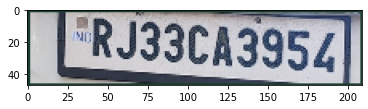

In [14]:
# Visualizing License Plate
plt.imshow(Plate)

In [15]:
# Saving License Plate
cv2.imwrite('C:/Users/Manzar Iqbal/NPD/Plate.jpg',Plate)

True